In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
train = pd.read_csv('/content/train.csv')

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
for column in train.columns:
  print(f'\nMissing {column} values = {len(train[train[column].isna()])}')


Missing PassengerId values = 0

Missing HomePlanet values = 201

Missing CryoSleep values = 217

Missing Cabin values = 199

Missing Destination values = 182

Missing Age values = 179

Missing VIP values = 203

Missing RoomService values = 181

Missing FoodCourt values = 183

Missing ShoppingMall values = 208

Missing Spa values = 183

Missing VRDeck values = 188

Missing Name values = 200

Missing Transported values = 0


<Axes: >

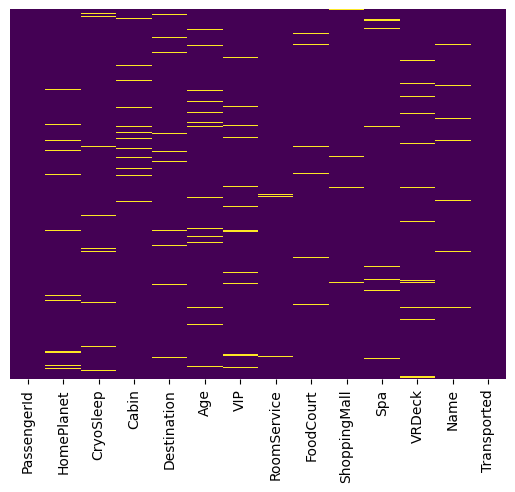

In [8]:
# Visualising missing data
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [9]:
# Replacing missing values in 'HomePlanet' and 'Destination' as 'Unknown'

train[['HomePlanet', 'Destination']] = train[['HomePlanet', 'Destination']].fillna('Unknown')


In [10]:
len(train[train['HomePlanet'].isna()]), len(train[train['Destination'].isna()])

(0, 0)

In [11]:
# Dropping the 'Name' column

train_df = train.drop('Name', axis=1)

<Axes: xlabel='Transported', ylabel='count'>

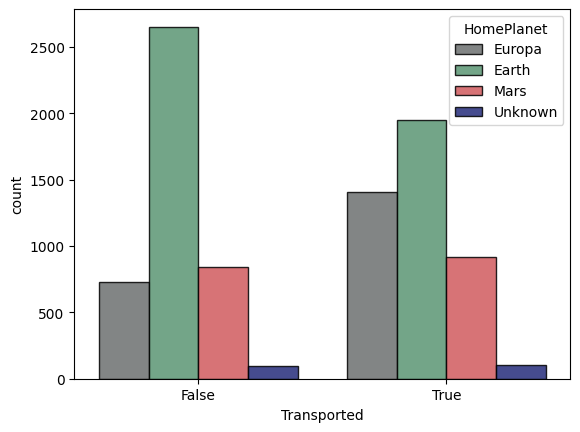

In [12]:
sns.countplot(x='Transported', hue='HomePlanet', data=train_df,
              palette=['#6B7071', '#519F71', '#E5464B', '#182189'], alpha=0.85, edgecolor="black")

<Axes: xlabel='Transported', ylabel='count'>

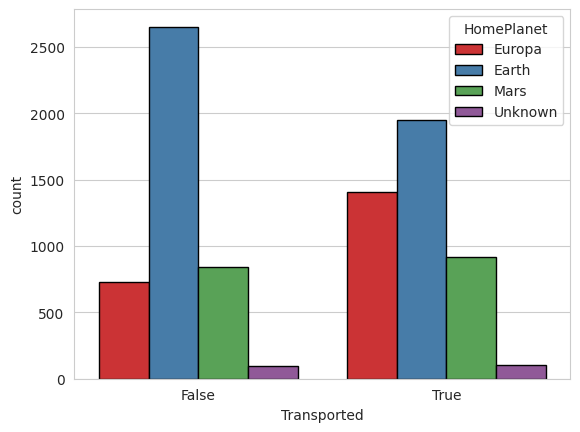

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='HomePlanet', data=train_df,
              palette='Set1', edgecolor="black")

<Axes: xlabel='HomePlanet', ylabel='Age'>

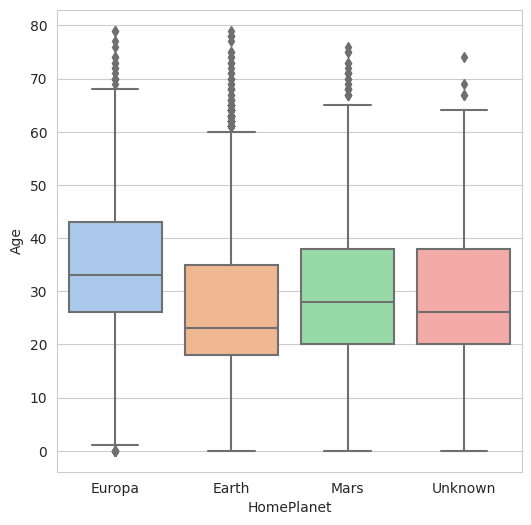

In [14]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='HomePlanet',y='Age',data=train_df,palette='pastel')

<Axes: xlabel='Transported', ylabel='Age'>

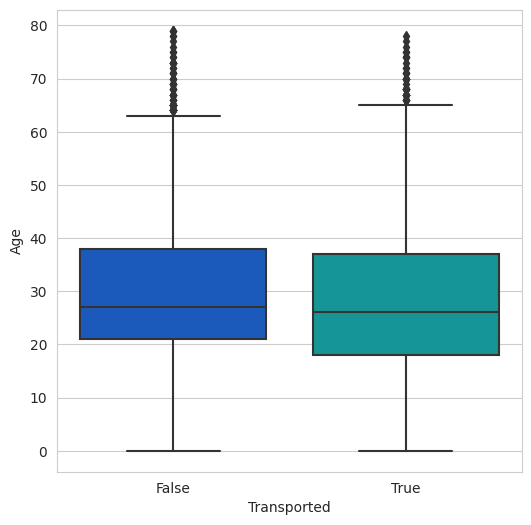

In [15]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Transported',y='Age',data=train_df,palette='winter')

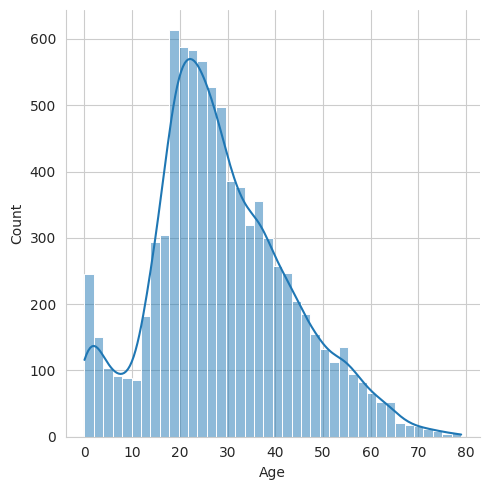

In [16]:
sns.displot(train_df['Age'].dropna(), kde=True, bins=40)

In [17]:
# Encoding the labels on 'Transported' column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_df['Transported'] = le.fit_transform(train_df['Transported'])
#train_df['Transported'] = train_df['Transported'].astype(np.uint8)

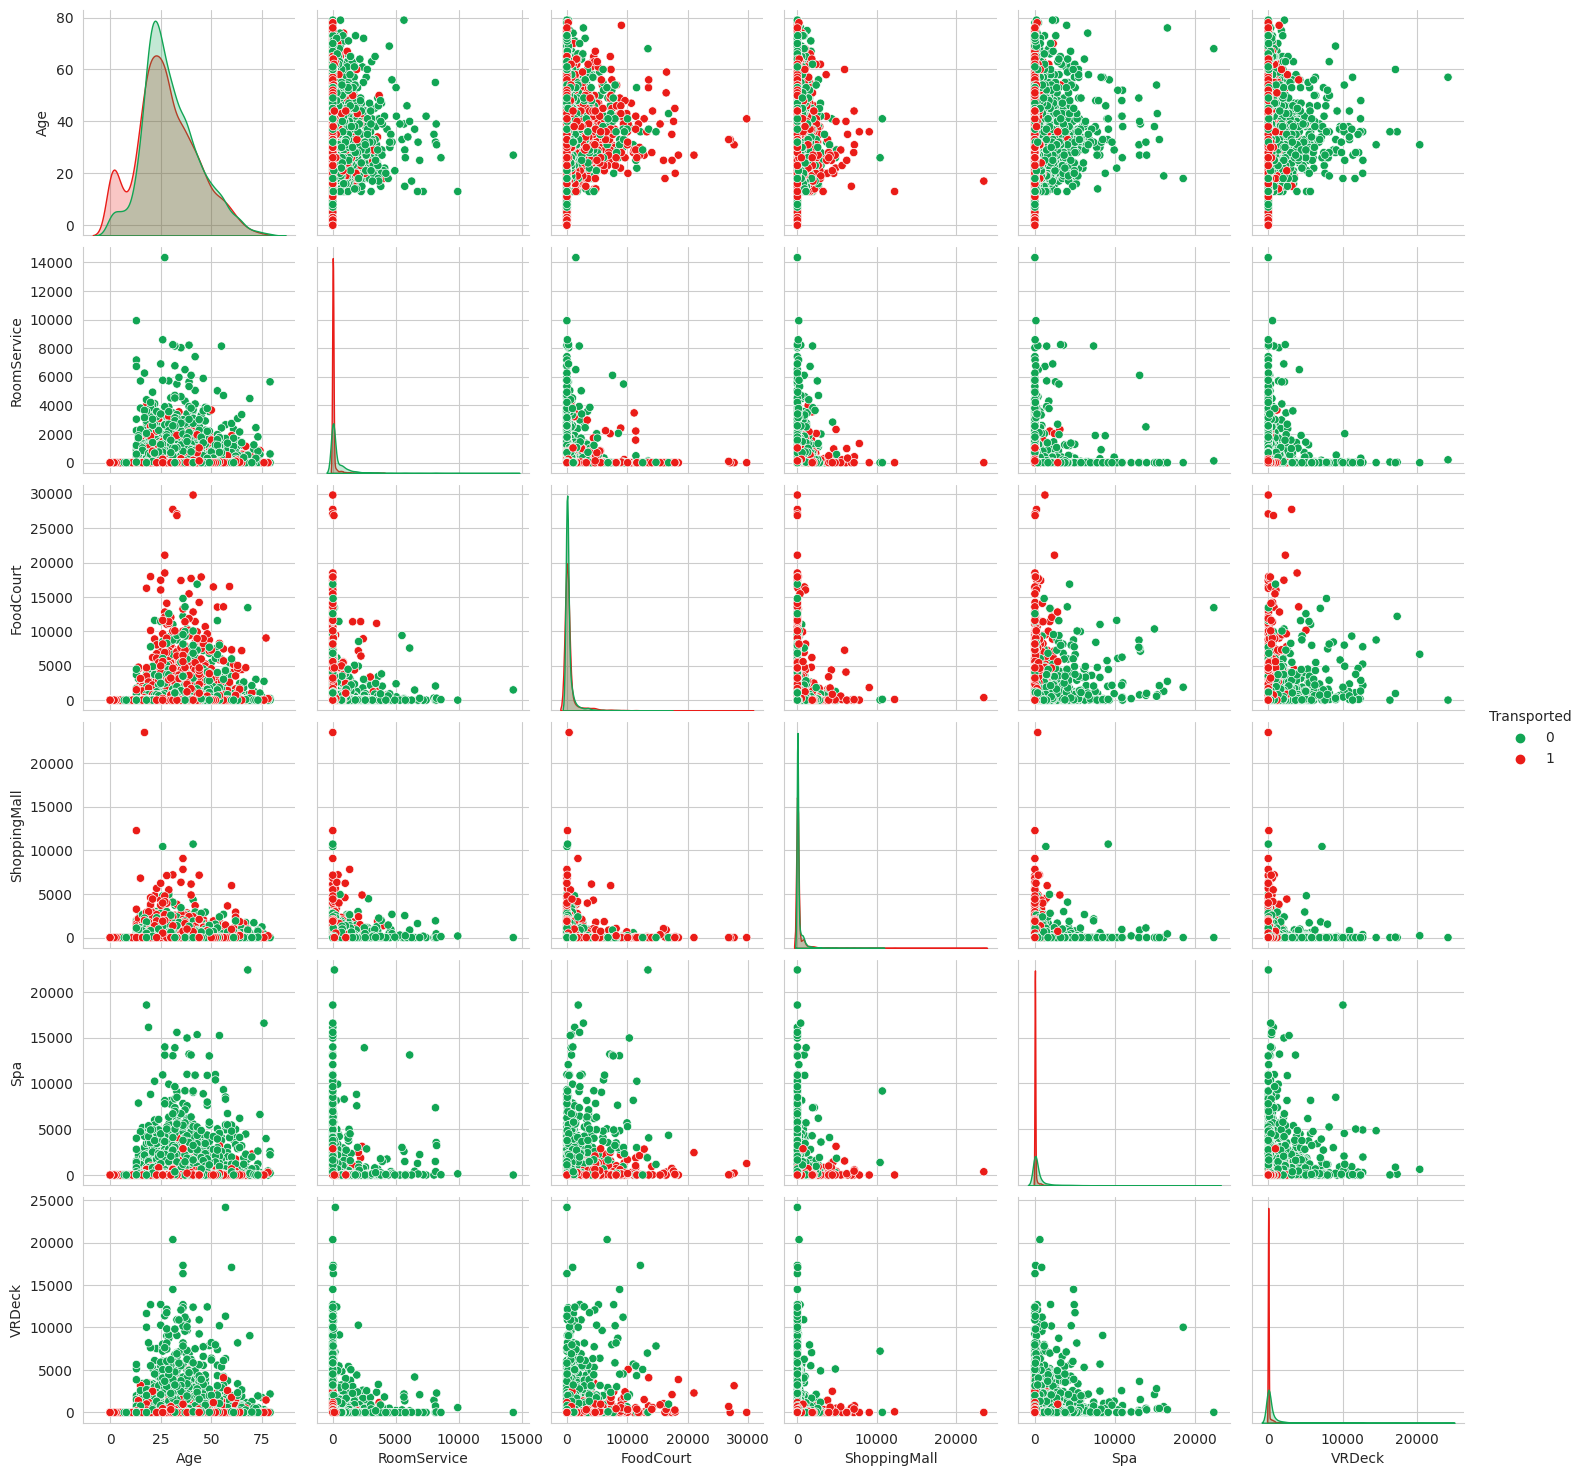

In [18]:
# Pairplots for numeric data

num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']

sns.pairplot(train_df[num_cols], hue='Transported', palette=['#11A554', '#EA1C18'])

# Red = Transported
# Green = Not Transported

In [19]:
# Filling in the missing non-numeric columns with 'Unknown'
text_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

train_df[text_cols] = train_df[text_cols].fillna('Unknown')

In [20]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0


In [21]:
# function to impute data on numeric columns and replacing missing values with mean based on 'HomePlanet'

def impute_mean_based_on_group(df, group_column, columns_to_impute):
    df[group_column] = df[group_column].fillna('Unknown')  # Replace empty cells with 'Unknown'
    for column in columns_to_impute:
        df[column] = df[column].fillna(df.groupby(group_column)[column].transform('mean'))
    return df

In [22]:
columns_to_impute = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_df = impute_mean_based_on_group(train_df, 'HomePlanet', columns_to_impute)

In [23]:
# Data encoding on the non-numeric columns
def encode_and_concatenate_columns(df, columns):
    encoded_dfs = []
    for column in columns:
        if column == 'HomePlanet' or column == 'Destination':
            encoded_df = pd.get_dummies(df[column], prefix=column)
        else:
            encoded_df = pd.get_dummies(df[column], prefix=column, drop_first=True)
        encoded_dfs.append(encoded_df)
    df = df.drop(columns, axis=1)
    df = pd.concat([df] + encoded_dfs, axis=1)
    return df

In [24]:
columns_to_encode = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP'] # not including cabin data

train_df = encode_and_concatenate_columns(train_df, columns_to_encode)

In [25]:
train_df = train_df.drop(['PassengerId','Cabin'], axis=1)

In [26]:
train_df.drop('Transported', axis=1).columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_Unknown', 'CryoSleep_True', 'CryoSleep_Unknown',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Destination_Unknown', 'VIP_True',
       'VIP_Unknown'],
      dtype='object')

<Axes: >

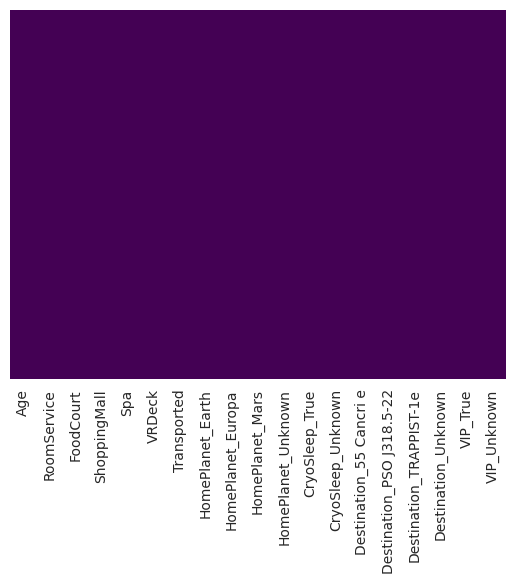

In [27]:
# Visualising missing data
sns.heatmap(train_df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

### Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Transported',axis=1),
                                                    train_df['Transported'], test_size=0.25,
                                                    random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions))

[[833 255]
 [213 873]]


In [31]:
from sklearn.metrics import classification_report

accuracy = logmodel.score(X_test, y_test)
print("Accuracy:", accuracy,'\n')

print(classification_report(y_test,predictions))

Accuracy: 0.7847286108555658 

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1088
           1       0.77      0.80      0.79      1086

    accuracy                           0.78      2174
   macro avg       0.79      0.78      0.78      2174
weighted avg       0.79      0.78      0.78      2174



In [32]:
# Prediction for the sample Test file

uploaded = files.upload()

Saving test.csv to test.csv


In [33]:
test = pd.read_csv('test.csv')

In [34]:
test_df = test.drop('Name', axis=1)

<Axes: >

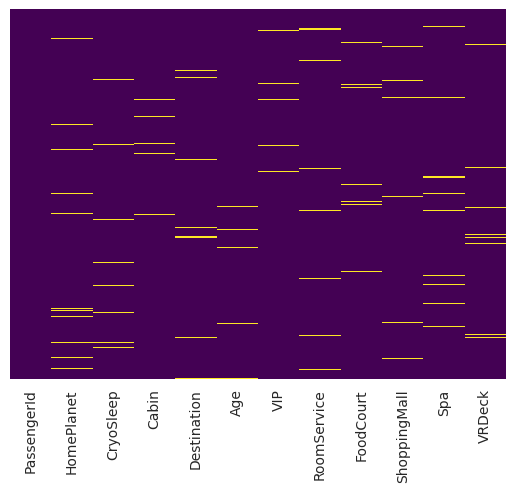

In [35]:
# Visualising missing data
sns.heatmap(test_df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [36]:
# Performing the same preprocessing as te training data

test_df[text_cols] = test_df[text_cols].fillna('Unknown')

test_df = impute_mean_based_on_group(test_df, 'HomePlanet', columns_to_impute)

test_df = encode_and_concatenate_columns(test_df, columns_to_encode)


In [37]:
test_df

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,CryoSleep_True,CryoSleep_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown,VIP_True,VIP_Unknown
0,0013_01,G/3/S,27.000000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,1,0,0,0
1,0018_01,F/4/S,19.000000,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0
2,0019_01,C/0/S,31.000000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0
3,0021_01,C/1/S,38.000000,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,0,0,0,1,0,0,0
4,0023_01,F/5/S,20.000000,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,G/1496/S,34.000000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,1,0,0,0
4273,9269_01,Unknown,42.000000,0.0,847.0,17.0,10.0,144.0,1,0,0,0,0,0,0,0,1,0,0,0
4274,9271_01,D/296/P,29.762806,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0,0
4275,9273_01,D/297/P,34.158859,0.0,2680.0,0.0,0.0,523.0,0,1,0,0,0,0,0,0,0,1,0,0


In [38]:
test_predictions = logmodel.predict(test_df.drop(['PassengerId', 'Cabin'], axis=1))

In [39]:
result = {'PassengerId': np.array(test_df.PassengerId), 'Transported': test_predictions}
result_df = pd.DataFrame(result)
result_df.Transported = result_df.Transported.map({0:'False', 1:'True'})
result_df

In [ ]:
# Kaggle submission file
result_df.to_csv('Logistic regression.csv', index=False)

### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [41]:
rfc_pred = rfc.predict(X_test)

In [42]:
rf_accuracy = rfc.score(X_test, y_test)
print("Accuracy:", rf_accuracy)

Accuracy: 0.781048758049678


In [43]:
print(f'Confusion matrix \n{confusion_matrix(y_test,rfc_pred)}')

print('\n', classification_report(y_test,rfc_pred))

Confusion matrix 
[[867 221]
 [255 831]]

               precision    recall  f1-score   support

           0       0.77      0.80      0.78      1088
           1       0.79      0.77      0.78      1086

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174



In [44]:
test_predictions_rf = rfc.predict(test_df.drop(['PassengerId', 'Cabin'], axis=1))

result_rf = {'PassengerId': np.array(test_df.PassengerId), 'Transported': test_predictions_rf}
result_rf_df = pd.DataFrame(result_rf)

result_rf_df.Transported = result_rf_df.Transported.map({0:'False', 1:'True'})
result_rf_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [45]:
# Kaggle submission file
result_rf_df.to_csv('Random Forest Classifier.csv', index=False)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
X_train_scaled = np.concatenate((X_train_scaled,
                                 np.array(X_train[['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
                                                   'HomePlanet_Unknown', 'CryoSleep_True', 'CryoSleep_Unknown',
                                                   'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
                                                   'Destination_TRAPPIST-1e', 'Destination_Unknown', 'VIP_True',
                                                   'VIP_Unknown']])), axis=1)

X_test_scaled = scaler.transform(X_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
X_test_scaled = np.concatenate((X_test_scaled,
                                 np.array(X_test[['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
                                                   'HomePlanet_Unknown', 'CryoSleep_True', 'CryoSleep_Unknown',
                                                   'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
                                                   'Destination_TRAPPIST-1e', 'Destination_Unknown', 'VIP_True',
                                                   'VIP_Unknown']])), axis=1)

In [47]:
rfc2 = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rfc2.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [48]:
rf2_accuracy = rfc2.score(X_test_scaled, y_test)
print("Accuracy:", rf2_accuracy)

Accuracy: 0.7847286108555658


### XGBoost model

In [49]:
#!pip install xgboost

In [50]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
xgb_clf = XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


In [52]:
features = train_df.drop('Transported', axis=1).columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)

# train the XGBoost classifier with the best hyperparameters
best_xgb_clf = XGBClassifier(**grid_search.best_params_)
best_xgb_clf.fit(X_train_scaled_df, y_train)

# make predictions on the test set
y_pred = best_xgb_clf.predict(X_test_scaled)

# print the confusion matrix and classification report
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Confusion matrix:
[[821 267]
 [174 912]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1088
           1       0.77      0.84      0.81      1086

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



In [53]:
#accuracy = best_xgb_clf.score(X_test, y_test)
#print("Accuracy:", accuracy,'\n')

In [54]:
accuracy = best_xgb_clf.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.797148114075437


In [55]:
test_predictions_xgb = best_xgb_clf.predict(test_df.drop(['PassengerId', 'Cabin'], axis=1))

result_xgb = {'PassengerId': np.array(test_df.PassengerId), 'Transported': test_predictions_xgb}
result_xgb_df = pd.DataFrame(result_xgb)

result_xgb_df.Transported = result_xgb_df.Transported.map({0:'False', 1:'True'})
result_xgb_df



,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [56]:
# Kaggle submission file
result_rf_df.to_csv('XGB Classifier.csv', index=False)

In [57]:
'''
xgboost.plot_importance(best_xgb_clf)

fig = plt.gcf()
fig.set_size_inches(8, 5)

plt.show()
'''

'\nxgboost.plot_importance(best_xgb_clf)\n\nfig = plt.gcf()\nfig.set_size_inches(8, 5)\n\nplt.show()\n'

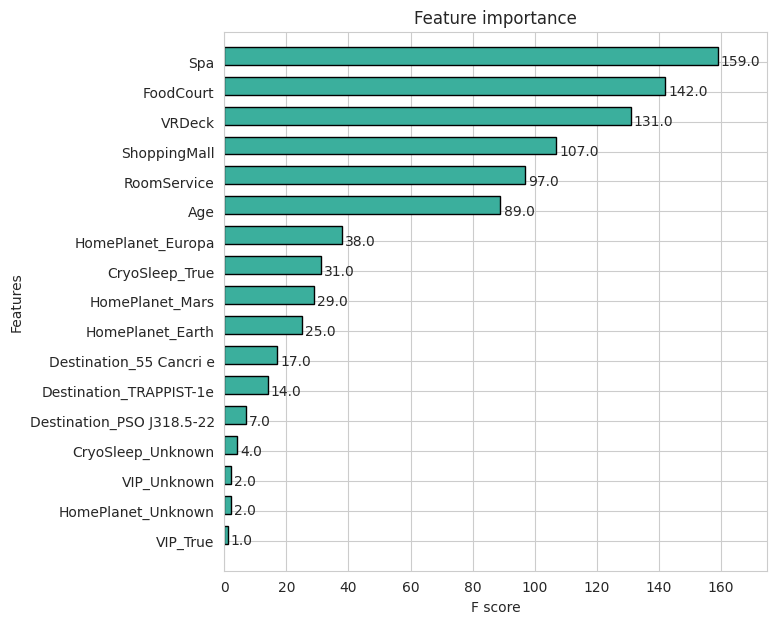

In [58]:
#ax = plt.figure(figsize=(8,5))

ax = xgboost.plot_importance(best_xgb_clf, color=['#3BAF9D'], edgecolor='black')

# Adjust the bar width
for rect in ax.patches:
    rect.set_height(0.6)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.show()

In [61]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.7 MB/s eta 0:00:00


In [63]:
import shap

In [64]:
explainer = shap.TreeExplainer(best_xgb_clf)
shap_values = explainer.shap_values(X_train_scaled_df)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


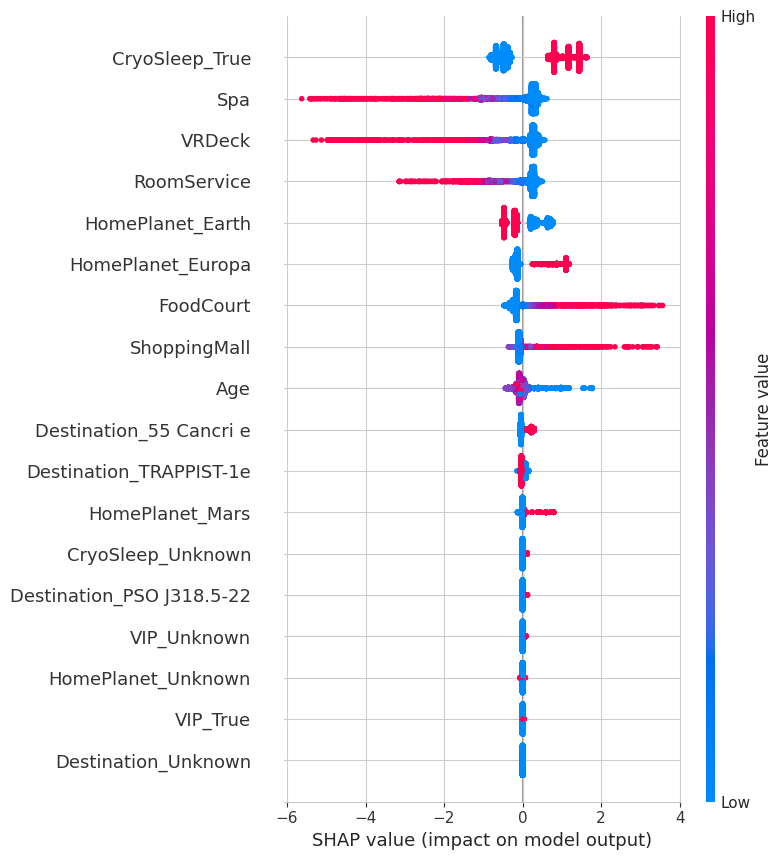

In [65]:
shap.summary_plot(shap_values, X_train_scaled_df)

In [73]:
explanation = shap.Explanation(
    values=shap_values,
    data=X_train_scaled_df.iloc[0],
    feature_names=X_train_scaled_df.columns,
)


In [76]:
explainer = shap.Explainer(best_xgb_clf, X_train_scaled_df)
shap_values = explainer(X_train_scaled_df)

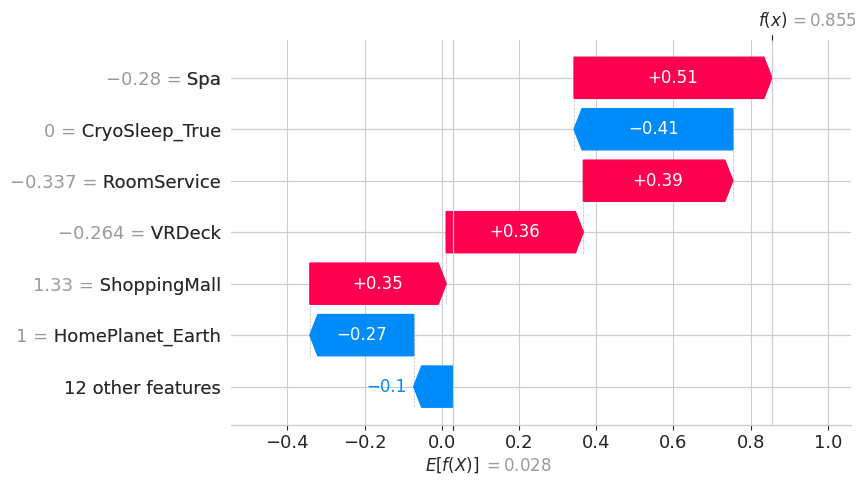

In [77]:
shap.plots.waterfall(shap_values[0],max_display=7)

In [78]:
shap_values = explainer.shap_values(X_train_scaled_df)